In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
import os

In [2]:
path = os.getcwd()

In [3]:
path

'C:\\Users\\Dell\\Documents\\Python_Scripts\\temp access\\ML_AkashSir\\AWS\\Projects\\Project_3'

In [4]:
# we are on correct path

In [5]:
df = pd.read_csv('breast-cancer.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
encoder = LabelEncoder()

In [13]:
df.diagnosis=encoder.fit_transform(df.diagnosis)

In [14]:
df.diagnosis.unique()

array([1, 0])

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568
id,842302.000000,842517.000000,8.430090e+07,8.434830e+07,8.435840e+07,843786.000000,844359.000000,8.445820e+07,844981.000000,8.450100e+07,845636.000000,8.461000e+07,846226.000000,846381.000000,8.466740e+07,8.479900e+07,848406.000000,8.486200e+07,849014.000000,8.510426e+06,8.510653e+06,8.510824e+06,8.511133e+06,851509.000000,852552.000000,852631.000000,852763.000000,852781.000000,852973.000000,853201.000000,853401.000000,853612.000000,8.538260e+07,854002.000000,854039.000000,854253.000000,854268.000000,854941.000000,855133.000000,855138.000000,...,918465.000000,91858.000000,9.190390e+07,9.190390e+07,9.193040e+07,919537.000000,919555.000000,9.197970e+07,919812.000000,921092.000000,921362.000000,921385.000000,921386.000000,921644.000000,922296.000000,922297.000000,922576.000000,922577.000000,922840.00000,923169.000000,923465.000000,923748.000000,923780.000000,924084.000000,924342.000000,924632.000000,924934.000000,924964.000000,925236.000000,925277.000000,925291.000000,925292.000000,925311.000000,925622.000000,926125.000000,926424.000000,926682.000000,926954.000000,927241.000000,92751.000000
diagnosis,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
radius_mean,17.990000,20.570000,1.969000e+01,1.142000e+01,2.029000e+01,12.450000,18.250000,1.371000e+01,13.000000,1.246000e+01,16.020000,1.578000e+01,19.170000,15.850000,1.373000e+01,1.454000e+01,14.680000,1.613000e+01,19.810000,1.354000e+01,1.308000e+01,9.504000e+00,1.534000e+01,21.160000,16.650000,17.140000,14.580000,18.610000,15.300000,17.570000,18.630000,11.840000,1.702000e+01,19.270000,16.130000,16.740000,14.250000,13.030000,14.990000,13.480000,...,12.070000,11.750000,1.167000e+01,1.368000e+01,2.047000e+01,10.960000,20.550000,1.427000e+01,11.690000,7.729000,7.691000,11.540000,14.470000,14.740000,13.210000,13.870000,13.620000,10.320000,10.26000,9.683000,10.820000,10.860000,11.130000,12.770000,9.333000,12.880000,10.290000,10.160000,9.423000,14.590000,11.510000,14.050000,11.200000,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
texture_mean,10.380000,17.770000,2.125000e+01,2.038000e+01,1.434000e+01,15.700000,19.980000,2.083000e+01,21.820000,2.404000e+01,23.240000,1.789000e+01,24.800000,23.950000,2.261000e+01,2.754000e+01,20.130000,2.068000e+01,22.150000,1.436000e+01,1.571000e+01,1.244000e+01,1.426000e+01,23.040000,21.380000,16.400000,21.530000,20.250000,25.270000,15.050000,25.110000,18.700000,2.398000e+01,26.470000,17.880000,21.590000,21.720000,18.420000,25.200000,20.820000,...,13.440000,17.560000,2.002000e+01,1.633000e+01,2.067000e+01,17.620000,20.860000,2.255000e+01,24.440000,25.490000,25.440000,14.440000,24.990000,25.420000,28.060000,20.700000,23.230000,16.350000,16.58000,19.340000,24.210000,21.480000,22.440000,29.430000,21.940000,28.920000,27.610000,19.590000,27.880000,22.680000,23.930000,27.150000,29.370000,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
perimeter_mean,122.800000,132.900000,1.300000e+02,7.758000e+01,1.351000e+02,82.57

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

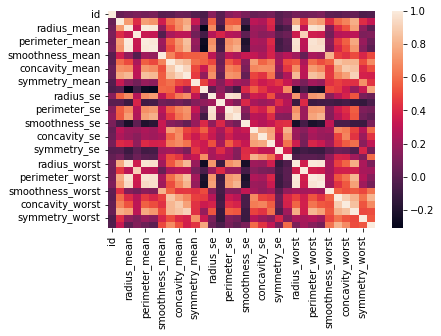

In [17]:
sns.heatmap(df.corr())

[]

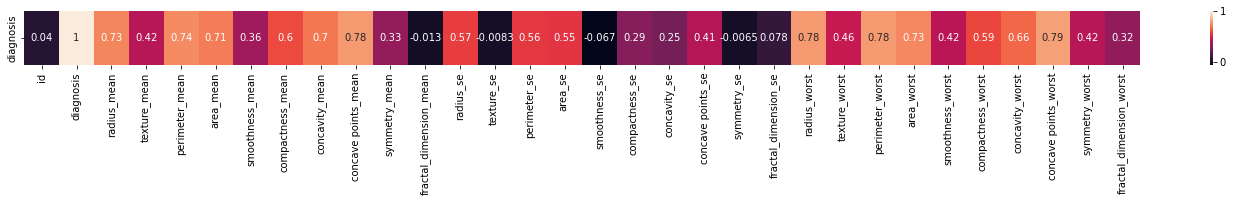

In [23]:
plt.figure(figsize=(25,1))
sns.heatmap(df.corr().iloc[1:2,:],annot=True)
plt.plot()

In [30]:
# checking multicolinearity using varience_inf_factor

vif = []
for i in range(df.shape[1]):
    vif.append(variance_inflation_factor(df.to_numpy(),i))
    
vif
    


[1.1642160397369354,
 6.7869183604789205,
 63793.19268781081,
 251.5183660101541,
 58217.366303771414,
 1305.7686479098995,
 393.5290639838986,
 201.7301439495651,
 158.1819435876635,
 154.93750657455442,
 184.54578066387487,
 654.9265787894476,
 237.90801524783754,
 24.758796749276534,
 211.44555355899394,
 73.61472766125837,
 26.566710544478813,
 45.010653178453296,
 33.69136628124679,
 54.424312383657714,
 37.22466548712548,
 27.575138348402792,
 9965.925337840488,
 343.50983716921047,
 4494.531727819296,
 1164.5544170394985,
 375.6810689161457,
 133.00282823735654,
 86.72202239232827,
 148.8732838999137,
 219.68497797091862,
 427.2694916440987]

In [31]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [33]:
# scaling doen the columns 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.drop('id',axis=1,inplace=True)

In [35]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [41]:
col=[]
for i in df.columns:
    print(f'for {i} min is {df[i].min()}')
    print(f'for {i} min is {df[i].max()}')
    print()
    if df[i].min() >1.5:
        col.append(i)

for diagnosis min is 0
for diagnosis min is 1

for radius_mean min is 6.981
for radius_mean min is 28.11

for texture_mean min is 9.71
for texture_mean min is 39.28

for perimeter_mean min is 43.79
for perimeter_mean min is 188.5

for area_mean min is 143.5
for area_mean min is 2501.0

for smoothness_mean min is 0.05263
for smoothness_mean min is 0.1634

for compactness_mean min is 0.01938
for compactness_mean min is 0.3454

for concavity_mean min is 0.0
for concavity_mean min is 0.4268

for concave points_mean min is 0.0
for concave points_mean min is 0.2012

for symmetry_mean min is 0.106
for symmetry_mean min is 0.304

for fractal_dimension_mean min is 0.04996
for fractal_dimension_mean min is 0.09744

for radius_se min is 0.1115
for radius_se min is 2.873

for texture_se min is 0.3602
for texture_se min is 4.885

for perimeter_se min is 0.757
for perimeter_se min is 21.98

for area_se min is 6.802
for area_se min is 542.2

for smoothness_se min is 0.001713
for smoothness_se min is 

In [44]:
df[col] = scaler.fit_transform(df[col])

In [45]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,0.273811,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,0.125660,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,0.162922,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,0.038155,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,0.163688,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


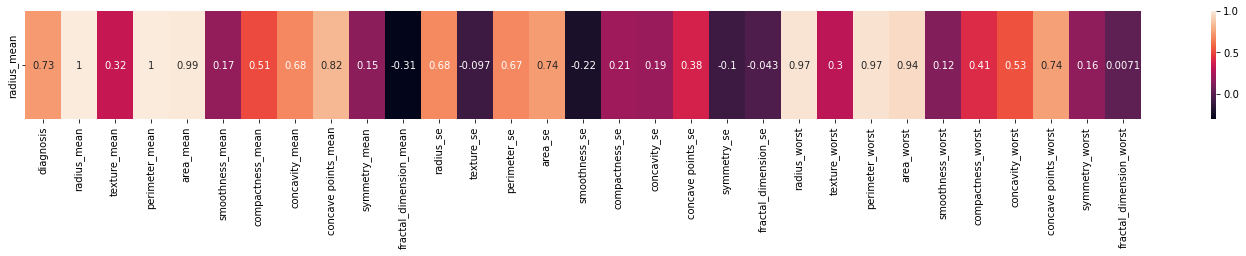

In [58]:
plt.figure(figsize = (25,2))
sns.heatmap(df.corr().iloc[1:2,:],annot=True,)
plt.show()

In [59]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [62]:
df.drop('fractal_dimension_worst',axis=1,inplace=True)

In [64]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [69]:
vif=[]
for i in range(df.shape[1]):
    vif.append(variance_inflation_factor(df.to_numpy(),i))
vif

[6.833268265394787,
 19475.15346527448,
 70.85904463982787,
 18570.830647716033,
 1000.6349454019413,
 389.3758245981585,
 182.64695520160595,
 157.6402384995661,
 152.83182227063907,
 184.19322085630793,
 256.93046879373895,
 228.20643757461332,
 24.700717677112923,
 209.13814037151067,
 62.88441101542575,
 26.481700924512918,
 40.42270190242942,
 32.94654283497495,
 54.020957832779686,
 36.53589518150625,
 16.380377645228105,
 3117.6221903864894,
 110.58856154280681,
 1524.2286671384418,
 847.4679149884767,
 373.0628603948334,
 98.34244054192844,
 82.25643432988984,
 147.9855873726519,
 218.39846589402123]

In [71]:
# now create model here
df.diagnosis.unique()

array([1, 0])

In [75]:
y = df['diagnosis']

In [76]:
x = df.drop('diagnosis',axis=1)

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [80]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [81]:
ypred  = model.predict(xtest)

In [82]:
ypred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1])

In [85]:
ytest1 = ytest.to_numpy()

In [88]:
sum(ypred-ytest1)

-2

In [89]:
matrix = classification_report(ytest,ypred)

In [91]:
print(matrix)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [92]:
accuracy = accuracy_score(ytest,ypred)

In [93]:
accuracy

0.9649122807017544

In [96]:
curve= roc_curve(ytest,ypred)

In [100]:
print(curve)

(array([0.        , 0.01515152, 1.        ]), array([0.    , 0.9375, 1.    ]), array([2, 1, 0]))


In [98]:
from sklearn.metrics import roc_auc_score

In [99]:
roc_auc_score(ytest,ypred)

0.9611742424242424